# Logistic Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic Regression

ref:
* https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
* https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

## Sigmoid Function

$$\sigma(x)=\frac{1}{1+e^{-\theta^{t}x}}$$
$\theta^{t}x$ is theta transpose x.  
$\theta^{t}x=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...$  
Sigmoid function or logistic function is the hypothesis function for logistic regression.

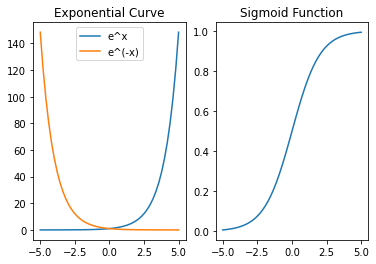

In [2]:
a=np.linspace(-5,5)
y1=[np.exp(x) for x in a]
y2=[np.exp(-x) for x in a]
sig=[1/(1+y) for y in y2]

plt.subplot(1,2,1)
plt.plot(a,y1,label="e^x")
plt.plot(a,y2,label="e^(-x)")
plt.legend()
plt.title("Exponential Curve")

plt.subplot(1,2,2)
plt.plot(a,sig)
plt.title("Sigmoid Function")
plt.show()

### Limits of Exponential
$$\lim_{x \to -\infty} e^{-x}=+\infty$$
$$\lim_{x \to 0} e^{-x}=1$$
$$\lim_{x \to +\infty} e^{-x}=0$$

### Limits of Sigmoid
$$\lim_{x \to -\infty} \sigma(x)=\lim_{x \to -\infty} \frac{1}{1+e^{-x}}=\frac{1}{1+\infty}=0$$

$$\lim_{x \to 0} \sigma(x)=\lim_{x \to 0} \frac{1}{1+e^{-x}}=\frac{1}{1+1}=0.5$$

$$\lim_{x \to +\infty} \sigma(x)=\lim_{x \to +\infty} \frac{1}{1+e^{-x}}=\frac{1}{1+0}=1$$

So, sigmoid function always end up with the result between 0 and 1. It has squashing effect. 

## Cost Function

$$\hat{y}=\frac{1}{1+e^{-z}}$$
$z=x_{1}*w_{1}+..........+x_{n}*w_{n} $

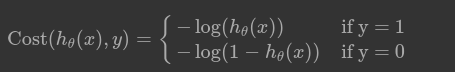This equation can be combined into one.
![Combined Cost Function](https://miro.medium.com/max/700/1*h9idzK6YjMKKxfCl-Zq8eA.png)


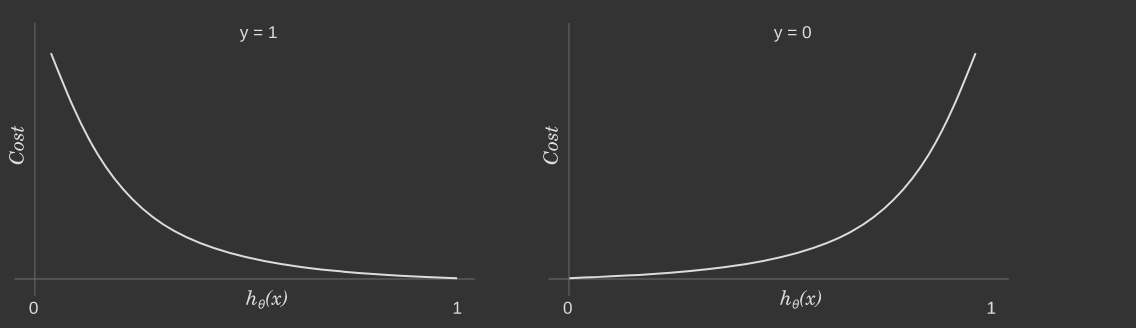

## Model Training

1. Find derivative of cost functionwrt weight. (Derivative give dir and by how much should w should be changed to minimize loss.)
2. Updating each weight according to derivative until the local minimum is found, i.e. model doesn’t improve anymore so we can stop.

Final equation after Derivative: $$x_{i}.(\hat{y}-y)$$  
Then, use gradient descent to find local minimum.

In [132]:
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost(self, y, y_hat):                 
        #predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return np.mean(-y*log(y_hat)-(1-y)*log(1-y_hat))
    def add_intercept(self,x):
        b=np.ones((x.shape[0], 1))
        #print(b)
        return np.concatenate((b, x), axis=1)
    def fit(self, x, y, epochs=1000, lr=0.01):        
        loss = []
        x=self.add_intercept(x)
        #weights = rand(x.shape[1])
        #print(weights)
        weights=np.zeros(x.shape[1])
        #print(x.shape)
        N = len(x)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(x, weights))
            weights -= lr * dot(x.T,  y_hat - y) / N            
            c=self.cost(y, y_hat)
            #print(c)
            # Saving Progress
            loss.append(c) 
        self.weights = weights
        self.loss = loss
    
    def predict(self, x):
        x=np.array(x) #because list desn't have shape method
        # Predicting with sigmoid function
        #print(x)
        x=self.add_intercept(x)
        z = dot(x, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

## Using own algorithm

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


data=load_breast_cancer()
X=data['data']
y=data['target']
cols=data.feature_names
df=pd.DataFrame(X,columns=cols)
df['target']=y
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=0)

In [116]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train,epochs=500,lr=0.001)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [117]:
pred=log_reg.predict(X_test)
accuracy_score(y_test,pred),f1_score(y_test,pred)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


(0.9210526315789473, 0.9352517985611511)

In [118]:
log_reg.weights

array([ 2.67418143e-02,  2.06922610e-01,  3.39834677e-01,  1.23051428e+00,
        8.03267922e-01,  2.02256496e-03, -1.95195493e-04, -2.62169239e-03,
       -1.18645170e-03,  3.81320436e-03,  1.56730817e-03,  2.78100611e-04,
        2.33291929e-02, -5.08913927e-03, -6.13236470e-01,  1.51590962e-04,
       -3.99626916e-05, -1.09245613e-04,  3.95212087e-05,  3.80628691e-04,
        4.48480529e-05,  2.15613976e-01,  4.32483881e-01,  1.25015131e+00,
       -9.31786356e-01,  2.65002731e-03, -1.64533484e-03, -4.83341698e-03,
       -1.03910124e-03,  5.51177760e-03,  1.61277744e-03])

In [119]:
a=np.arange(1,501)

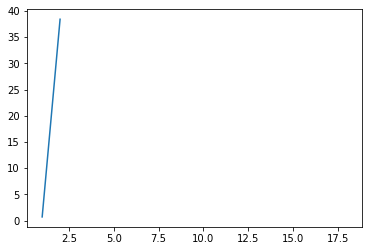

In [120]:
plt.plot(a,log_reg.loss)

## Using Sklearn

In [121]:

from sklearn.linear_model import LogisticRegression as lg
ll=lg(max_iter=2500)
ll.fit(X_train,y_train)
sk_pred=ll.predict(X_test)

In [133]:
accuracy_score(y_test,sk_pred),f1_score(y_test,sk_pred)

(0.9473684210526315, 0.9538461538461538)

## Iris Dataset (only 2 targets) using own alg

In [123]:
from sklearn.datasets import load_iris
iris = pd.read_csv('iris.csv')
iris['target']=iris['Name'].map({'Iris-setosa':0,'Iris-virginica':1})
iris.dropna(axis=0,inplace=True)
X_fl=iris.iloc[:,0:4].values
y_fl=iris.iloc[:,5].values

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [124]:
logreg = LogisticRegression()
logreg.fit(X_fl, y_fl, epochs=500, lr=0.5)
y_pred = logreg.predict([[5.1, 3.5, 1.4, 0.2],[4.9, 3. , 1.4, 0.2],[7.3, 2.9, 6.3, 1.8]])
y_pred

[0, 0, 1]

In [125]:
len(logreg.loss)

500

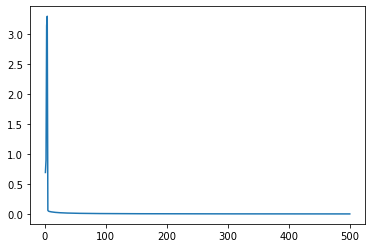

In [126]:
itr=np.arange(1,501)
plt.plot(itr,logreg.loss)

## Breast Cancer with normalize (fited in own alg)

In [134]:
from sklearn.preprocessing import normalize

new=normalize(X)

In [135]:
log1=LogisticRegression()
log1.fit(X,y)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [137]:
pred_norm=log_reg.predict(X)
accuracy_score(y,pred_norm),f1_score(y,pred_norm)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


(0.9156414762741653, 0.9342465753424658)